In [18]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [47]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [56]:
train_set=train.flow_from_directory('/content/drive/MyDrive/monan',target_size = (200,200),batch_size = 10,class_mode = 'categorical')


Found 200 images belonging to 10 classes.


In [49]:
train_set.class_indices


{'bánh chưng': 0,
 'bánh da lợn': 1,
 'bánh giầy': 2,
 'bánh giò': 3,
 'bánh ít': 4,
 'bánh khọt': 5,
 'bánh rán': 6,
 'bánh tiêu': 7,
 'bánh xèo': 8,
 'bánh đúc': 9}

In [55]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(252,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 25, 25, 128)    

In [57]:
history = model.fit(train_set,batch_size=64,epochs=10,verbose=1)


Epoch 1/10
11/20 [===============>..............] - ETA: 9s - loss: 14.0361 - accuracy: 0.0909 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


20/20 [==============================] - 22s 1s/step - loss: 8.7653 - accuracy: 0.0700
Epoch 2/10
20/20 [==============================] - 5s 234ms/step - loss: 2.2850 - accuracy: 0.1100
Epoch 3/10
20/20 [==============================] - 5s 235ms/step - loss: 2.1809 - accuracy: 0.2350
Epoch 4/10
20/20 [==============================] - 5s 273ms/step - loss: 1.9273 - accuracy: 0.3600
Epoch 5/10
20/20 [==============================] - 5s 243ms/step - loss: 1.8113 - accuracy: 0.4200
Epoch 6/10
20/20 [==============================] - 5s 235ms/step - loss: 1.6831 - accuracy: 0.4150
Epoch 7/10
20/20 [==============================] - 5s 240ms/step - loss: 1.6483 - accuracy: 0.4250
Epoch 8/10
20/20 [==============================] - 5s 236ms/step - loss: 1.4553 - accuracy: 0.5050
Epoch 9/10
20/20 [==============================] - 5s 232ms/step - loss: 1.3304 - accuracy: 0.5600
Epoch 10/10
20/20 [==============================] - 5s 236ms/step - loss: 1.1082 - accuracy: 0.6650


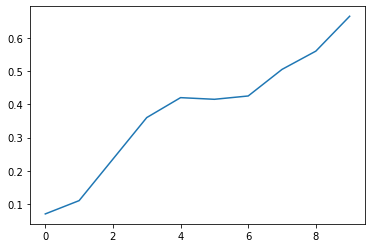

In [58]:
plt.plot(history.history['accuracy'])

In [59]:
model.save('monan.h5')

In [64]:
labels = {0:'bánh chưng',
 1:'bánh da lợn',
 2:'bánh giầy',
 3:'bánh giò',
 4:'bánh ít',
 5:'bánh khọt',
 6:'bánh rán',
 7:'bánh tiêu',
 8:'bánh xèo',
 9:'bánh đúc'}

In [68]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
from keras.preprocessing.image import load_img,img_to_array
model= load_model('monan.h5')

kết quả dự đoán


'bánh chưng'

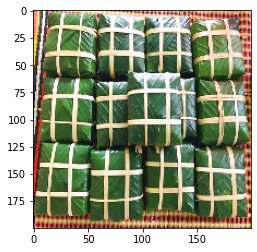

In [67]:
img= load_img('1485364688-ha-rika.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'bánh giò'

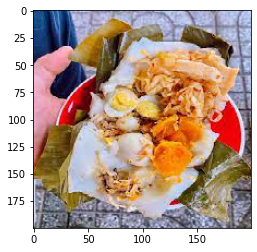

In [69]:
img= load_img('1.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]

kết quả dự đoán


'bánh xèo'

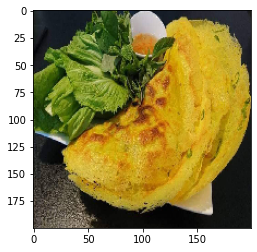

In [70]:
img= load_img('8-1.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,200,200,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

labels[int(np.argmax(result))]